In [0]:

import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets as datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, regularizers
from os import getcwd
import matplotlib.pyplot as pyplot


In [3]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [4]:

print(train_images.shape)

(50000, 32, 32, 3)


In [0]:
training_images_20k = train_images[0:20000]
training_labels_20k = train_labels[0:20000]



In [0]:
weight_decay = 1e-4
model = models.Sequential([
          Conv2D(16,(3,3),activation='relu', input_shape=(64, 64, 3)),
          MaxPooling2D(pool_size=(2,2)),
          Conv2D(32,(3,3),activation='relu'),
        
          Flatten(),
          Dense(10,activation='softmax')
      ])

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
flatten_2 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                125450    
Total params: 146,378
Trainable params: 146,378
Non-trainable params: 0
_________________________________________________________________


In [0]:

model.compile(optimizer =tf.keras.optimizers.Adam(
    learning_rate=0.001), loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(training_images_20k,training_labels_20k,epochs=100,validation_data=(test_images,test_labels),batch_size=128)


Epoch 1/100
157/157 [==============================] - 2s 14ms/step - loss: 2.2701 - accuracy: 0.3487 - val_loss: 1.8708 - val_accuracy: 0.3746
Epoch 2/100
157/157 [==============================] - 2s 13ms/step - loss: 1.6179 - accuracy: 0.4893 - val_loss: 1.3845 - val_accuracy: 0.5104
Epoch 3/100
157/157 [==============================] - 2s 13ms/step - loss: 1.4121 - accuracy: 0.5574 - val_loss: 1.4324 - val_accuracy: 0.5860
Epoch 4/100
157/157 [==============================] - 2s 12ms/step - loss: 1.3281 - accuracy: 0.6003 - val_loss: 1.4359 - val_accuracy: 0.5547
Epoch 5/100
157/157 [==============================] - 2s 12ms/step - loss: 1.1757 - accuracy: 0.6434 - val_loss: 1.0611 - val_accuracy: 0.6625
Epoch 6/100
157/157 [==============================] - 2s 12ms/step - loss: 1.0932 - accuracy: 0.6699 - val_loss: 1.0480 - val_accuracy: 0.6677
Epoch 7/100
157/157 [==============================] - 2s 12ms/step - loss: 1.0110 - accuracy: 0.6944 - val_loss: 1.0494 - val_accuracy:

Text(0.5, 1.0, 'Training and Testing loss')

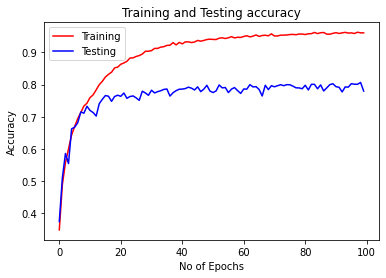

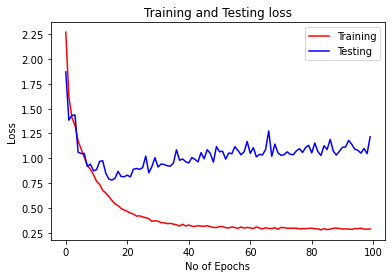

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt


acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc))
plt.plot(epochs, acc, 'r',label='Training')
plt.plot(epochs, val_acc, 'b',label ='Testing')
plt.title('Training and Testing accuracy')
plt.xlabel("No of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'r',label='Training')
plt.plot(epochs, val_loss, 'b',label='Testing')
plt.xlabel("No of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title('Training and Testing loss')

